In [27]:
from statsmodels import api as sm
from matplotlib import pyplot as plt
from regressions import LogisticRegression as lgr
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()

### Reading and describing the data

In [2]:
path = 'train.csv'

raw_data = pd.read_csv(path)

In [3]:
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Plotting for better understanding

<h4>Histograms<h4>

<Axes: xlabel='Pclass', ylabel='Count'>

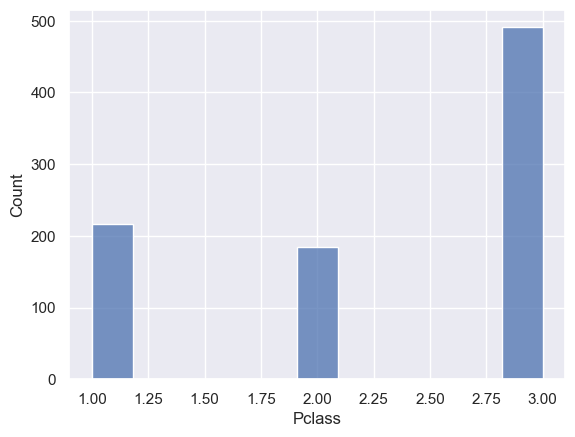

In [6]:
sns.histplot(raw_data['Pclass'])

<h4>Scattering</h4>

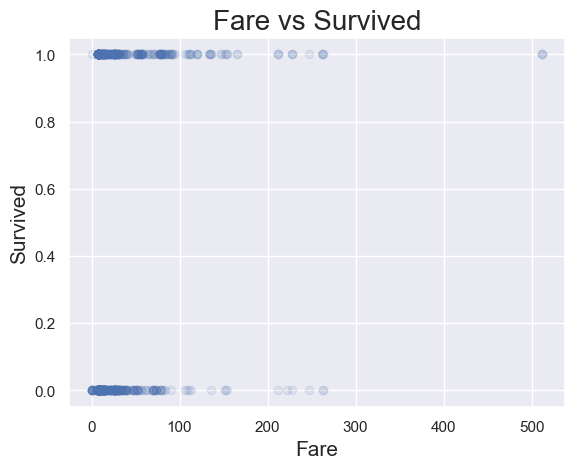

In [7]:
plt.scatter(raw_data['Fare'], raw_data['Survived'], alpha=0.1)
plt.xlabel('Fare', fontsize=15)
plt.ylabel('Survived', fontsize=15)
plt.title('Fare vs Survived', fontsize=20)
plt.show()

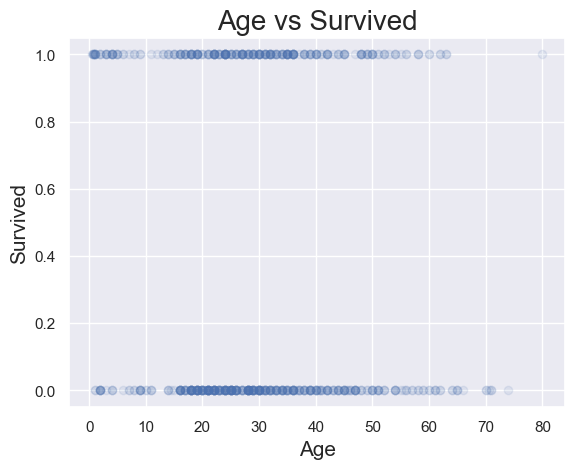

In [8]:
plt.scatter(raw_data['Age'], raw_data['Survived'], alpha=0.1)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Survived', fontsize=15)
plt.title('Age vs Survived', fontsize=20)
plt.show()

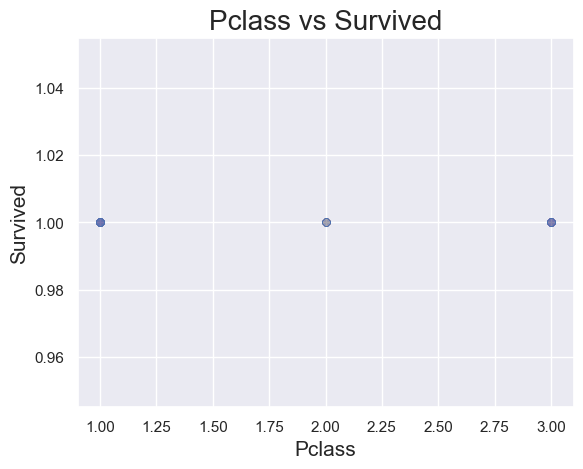

In [9]:
y_survived_1 = raw_data[raw_data['Survived'] == 1]['Survived']
x_pclass_1 = raw_data[raw_data['Survived'] == 1]['Pclass']

plt.scatter(x_pclass_1, y_survived_1, alpha=0.002)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Survived', fontsize=15)
plt.title('Pclass vs Survived', fontsize=20)
plt.show()

### Preparing the data deviding to the inputs and outputs and deleting NaN

In [10]:
data = raw_data.copy()

data = data.drop('Cabin', axis=1)
data = data.drop('Ticket', axis=1)
data = data.drop('PassengerId', axis=1)
data = data.drop('Name', axis=1)

In [11]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
data = data.dropna()

In [13]:
data['Sex'] = data['Sex'].map({
    'male': 1,
    'female': 0
})

data['Embarked'] = data['Embarked'].map({
    'S': 0,
    'C': 1,
    'Q': 2
})

In [14]:
data 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,2
886,0,2,1,27.0,0,0,13.0000,0
887,1,1,0,19.0,0,0,30.0000,0
889,1,1,1,26.0,0,0,30.0000,1


In [15]:
inputs_data = data.drop('Survived', axis=1)
output_data = data['Survived']

### Creating a regression

<h4>Logistic regression with the all independ variables</h4>

In [16]:
reg_all = lgr(data=data, inputs=inputs_data.columns.tolist(), output='Survived')
reg_all.main()

Optimization terminated successfully.
         Current function value: 0.445965
         Iterations 6


{'Summary': <class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:               Survived   No. Observations:                  712
 Model:                          Logit   Df Residuals:                      704
 Method:                           MLE   Df Model:                            7
 Date:                Tue, 04 Jul 2023   Pseudo R-squ.:                  0.3391
 Time:                        15:48:06   Log-Likelihood:                -317.53
 converged:                       True   LL-Null:                       -480.45
 Covariance Type:            nonrobust   LLR p-value:                 1.810e-66
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          5.3472      0.607      8.816      0.000       4.158       6.536
 Pclass        -1.2392      0.163     -7.600      0.000    

<h4>Logistic regression without Parch, Fare, Embarked</h4>

In [17]:
regl1 = lgr(data=data, inputs=['Pclass', 'Sex', 'Age'], output='Survived')
regl1.main()

Optimization terminated successfully.
         Current function value: 0.454140
         Iterations 6


{'Summary': <class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:               Survived   No. Observations:                  712
 Model:                          Logit   Df Residuals:                      708
 Method:                           MLE   Df Model:                            3
 Date:                Tue, 04 Jul 2023   Pseudo R-squ.:                  0.3270
 Time:                        15:48:06   Log-Likelihood:                -323.35
 converged:                       True   LL-Null:                       -480.45
 Covariance Type:            nonrobust   LLR p-value:                 8.365e-68
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          5.0466      0.502     10.052      0.000       4.063       6.031
 Pclass        -1.2848      0.139     -9.226      0.000    

<h4>Logistic regression without Parch, Embarked</h4>

In [18]:
regl2 = lgr(data=data, inputs=['Pclass', 'Sex', 'Age', 'Fare'], output='Survived')
regl2.main()

Optimization terminated successfully.
         Current function value: 0.454099
         Iterations 6


{'Summary': <class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:               Survived   No. Observations:                  712
 Model:                          Logit   Df Residuals:                      707
 Method:                           MLE   Df Model:                            4
 Date:                Tue, 04 Jul 2023   Pseudo R-squ.:                  0.3271
 Time:                        15:48:06   Log-Likelihood:                -323.32
 converged:                       True   LL-Null:                       -480.45
 Covariance Type:            nonrobust   LLR p-value:                 9.057e-67
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          4.9805      0.572      8.706      0.000       3.859       6.102
 Pclass        -1.2665      0.159     -7.986      0.000    

<h4>Logistic regression without Parch</h4>

In [19]:
regl3 = lgr(data=data, inputs=['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], output='Survived')
regl3.main()

Optimization terminated successfully.
         Current function value: 0.453696
         Iterations 6


{'Summary': <class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:               Survived   No. Observations:                  712
 Model:                          Logit   Df Residuals:                      706
 Method:                           MLE   Df Model:                            5
 Date:                Tue, 04 Jul 2023   Pseudo R-squ.:                  0.3277
 Time:                        15:48:06   Log-Likelihood:                -323.03
 converged:                       True   LL-Null:                       -480.45
 Covariance Type:            nonrobust   LLR p-value:                 6.446e-66
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          4.9372      0.574      8.600      0.000       3.812       6.062
 Pclass        -1.2653      0.159     -7.974      0.000    

### Loading Test data and describing it

In [20]:
path_test = 'test.csv'

raw_test_data = pd.read_csv(path_test)

In [21]:
raw_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Cleaning the data

In [22]:
test_data = raw_test_data.copy()

test_data = test_data.drop('Cabin', axis=1)
test_data = test_data.drop('Ticket', axis=1)
test_data = test_data.drop('PassengerId', axis=1)
test_data = test_data.drop('Name', axis=1)

test_data = test_data.dropna()

test_data['Sex'] = test_data['Sex'].map({
    'male': 1,
    'female': 0
})

test_data['Embarked'] = test_data['Embarked'].map({
    'S': 0,
    'C': 1,
    'Q': 2
})

### Predicting the test data

In [23]:
test_data_constant = sm.add_constant(test_data)
predictions_test = reg_all.log_reg.predict(test_data_constant)
predictions_test.round()

0      0.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
409    1.0
411    1.0
412    1.0
414    1.0
415    0.0
Length: 331, dtype: float64

In [24]:
answer = test_data.copy()
answer['Survived (predicted)'] = predictions_test.round()

### Answer is DataFrame that contains prediction

In [26]:
answer

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived (predicted)
0,3,1,34.5,0,0,7.8292,2,0.0
1,3,0,47.0,1,0,7.0000,0,0.0
2,2,1,62.0,0,0,9.6875,2,0.0
3,3,1,27.0,0,0,8.6625,0,0.0
4,3,0,22.0,1,1,12.2875,0,1.0
...,...,...,...,...,...,...,...,...
409,3,0,3.0,1,1,13.7750,0,1.0
411,1,0,37.0,1,0,90.0000,2,1.0
412,3,0,28.0,0,0,7.7750,0,1.0
414,1,0,39.0,0,0,108.9000,1,1.0
